# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Описание данных
- 
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- 
balcony — число балконов
- 
ceiling_height — высота потолков (м)
- 
cityCenters_nearest — расстояние до центра города (м)
- 
days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- 
first_day_exposition — дата публикации
- 
floor — этаж
- 
floors_total — всего этажей в доме
- 
is_apartment — апартаменты (булев тип)
- 
kitchen_area — площадь кухни в квадратных метрах (м²)
- 
last_price — цена на момент снятия с публикации
- 
living_area — жилая площадь в квадратных метрах(м²)
- 
locality_name — название населённого пункта
- 
open_plan — свободная планировка (булев тип)
- 
parks_around3000 — число парков в радиусе 3 км
- 
parks_nearest — расстояние до ближайшего парка (м)
- 
ponds_around3000 — число водоёмов в радиусе 3 км
- 
ponds_nearest — расстояние до ближайшего водоёма (м)
- 
rooms — число комнат
- 
studio — квартира-студия (булев тип)
- 
total_area — площадь квартиры в квадратных метрах (м²)
- 
total_images — число фотографий квартиры в объявлении


# Стадии выполнения проекта:

1. Открыть файл с данными и изучите общую информацию

2. Предобработать данные

3. Посчитайть и добавите в таблицу:
 - 
цену квадратного метра
 - 
день недели, месяц и год публикации объявления
 - 
этаж квартиры; варианты — первый, последний, другой
 - 
соотношение жилой и общей площади, а также отношение площади кухни к общей


4. Провести исследовательский анализ данных

5. Написать общий вывод

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [3]:
#Открываю файл с данными с разделением колонок с помощью табуляции
import matplotlib.pyplot as plt
import pandas as pd
apartments_info = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
apartments_info.head(10)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
apartments_info.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
apartments_info.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

В данных много пропусков. Пропуски в столбце "is_apartment" - могут быть по причине того, что недвижимость не является апартаментами и данные не заполнили, пропустили, такое же предположение и для пропусков в столбце "balcony". Пропуски в столбцах "ceiling_height", "airports_nearest", "cityCenters_nearest", "parks_nearest", "ponds_nearest", "days_exposition" - скорее всего просто не внесенные или потерянные данные Столбцы содержащие around300 - возможно не заполнены из-за отсутствия прудов или парков в округе.
Максимальная высота полотков 100 метров и минимальная 1 метр - сомнительно, возможно, опечатка.

### Шаг 2. Предобработка данных

In [6]:
#Отсутствующие значения
apartments_info.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
#Процент отсутствующих значений для каждого столбца
(apartments_info.isnull().sum()/len(apartments_info)).sort_values()

total_images            0.000000
open_plan               0.000000
floor                   0.000000
rooms                   0.000000
studio                  0.000000
total_area              0.000000
last_price              0.000000
first_day_exposition    0.000000
locality_name           0.002068
floors_total            0.003629
living_area             0.080299
kitchen_area            0.096122
days_exposition         0.134225
ponds_around3000        0.232837
parks_around3000        0.232837
cityCenters_nearest     0.232879
airports_nearest        0.233850
ceiling_height          0.387991
balcony                 0.486054
ponds_nearest           0.615596
parks_nearest           0.659100
is_apartment            0.882906
dtype: float64

In [8]:
#Посмотрим какие значения присутствуют в столбце, что бы заполнить пропуски
apartments_info['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Кажется, заполнять 'is_apartment' самим не получится, так как предположение, что "пропуски в столбце "is_apartment" - могут быть по причине того, что недвижимость не является апартаментами и данные не заполнили" не подходит, так как на 20000 значений, всего лишь 50 апартаментов - сомнительное число.

In [9]:
#Заполняю пропуски в столбце 'balcony' нулями, так как пропуски - скорее всего из-за отсутствия балкона.

apartments_info['balcony'] = apartments_info['balcony'].fillna(0)

In [10]:
#Замена пропусков в столбце "airports_nearest" медианным значением, так как аэропорт в округе Санкт-Петербурга всего один "Пулково".

def airports_nearest_fillna(name):
    airports_nearest_list = apartments_info[apartments_info['airports_nearest'].notna()]['locality_name'].unique()
    na_before = apartments_info.loc[(apartments_info['locality_name'] == name) & (apartments_info['airports_nearest'].isna())].shape[0]
    if name in airports_nearest_list:
        median_value = apartments_info[apartments_info['locality_name'] == name]['airports_nearest'].median()
    else:
        median_value = apartments_info['airports_nearest'].median()
    apartments_info.loc[(apartments_info['locality_name'] == name) & (apartments_info['airports_nearest'].isna()), 'airports_nearest'] = median_value
    na_after = apartments_info.loc[(apartments_info['locality_name'] == name) & (apartments_info['airports_nearest'].isna())].shape[0]
    print(name, na_before, na_after)
                        
for name in apartments_info['locality_name'].unique():
    airports_nearest_fillna(name)
    

Санкт-Петербург 85 0
посёлок Шушары 4 0
городской посёлок Янино-1 61 0
посёлок Парголово 0 0
посёлок Мурино 522 0
Ломоносов 1 0
Сертолово 142 0
Петергоф 0 0
Пушкин 0 0
деревня Кудрово 299 0
Коммунар 89 0
Колпино 1 0
поселок городского типа Красный Бор 5 0
Гатчина 307 0
поселок Мурино 32 0
деревня Фёдоровское 8 0
Выборг 237 0
Кронштадт 1 0
Кировск 84 0
деревня Новое Девяткино 144 0
посёлок Металлострой 0 0
посёлок городского типа Лебяжье 11 0
посёлок городского типа Сиверский 29 0
поселок Молодцово 9 0
поселок городского типа Кузьмоловский 13 0
садовое товарищество Новая Ропша 1 0
Павловск 0 0
деревня Пикколово 1 0
Всеволожск 398 0
Волхов 111 0
Кингисепп 104 0
Приозерск 66 0
Сестрорецк 0 0
деревня Куттузи 7 0
посёлок Аннино 11 0
поселок городского типа Ефимовский 3 0
посёлок Плодовое 5 0
деревня Заклинье 3 0
поселок Торковичи 3 0
поселок Первомайское 8 0
Красное Село 2 0
посёлок Понтонный 0 0
Сясьстрой 24 0
деревня Старая 64 0
деревня Лесколово 20 0
посёлок Новый Свет 17 0
Сланцы 112 0


In [11]:
#Заполняю пропуски в столбце 'parks_nearest' медианным значением

parks_nearest_median = apartments_info['parks_nearest'].sort_values().median()

apartments_info['parks_nearest'] = apartments_info['parks_nearest'].fillna(parks_nearest_median)




In [12]:
#Заполняю пропуски в столбце'ponds_around3000' нулевым значением, так как скорее всего водоемы в данном радиусе отсутствуют

apartments_info['ponds_around3000'] = apartments_info['ponds_around3000'].fillna(0)



In [13]:
#Заполняю пропуски в столбце'parks_around3000' нулевым значением, так как скорее всего парки в данном радиусе отсутствуют

apartments_info['parks_around3000'] = apartments_info['parks_around3000'].fillna(0)

In [14]:
#Высоту потолков заполняю по локации, так как скорее всего здания с высокими потолками строились в определенных районах, ближе к центру, например

apartments_info['ceiling_height'] = apartments_info['ceiling_height'].fillna(apartments_info.groupby('locality_name')['ceiling_height'].transform('median'))



In [15]:
#Жилую площадь заполняю по среднему коэффициенту отношения жилой площади к общей

living_area_part_mean = apartments_info['living_area'].mean() / apartments_info['total_area'].mean()
apartments_info['living_area'] = apartments_info['living_area'].fillna(apartments_info['total_area'] * living_area_part_mean)


In [16]:
# Площадь кухни заполним по среднему коэффициенту отношения площади кухни к общей
kitchen_part_mean = apartments_info['kitchen_area'].mean() / apartments_info['total_area'].mean()
apartments_info['kitchen_area'] = apartments_info['kitchen_area'].fillna(apartments_info['total_area'] * kitchen_part_mean)




In [17]:
#Количество этажей в здании заполним относительно локации, так как скорее всего высота зависит от местоположения, например в Санкт-Петербурге здания будут выше, чем за его пределами.

floors_total_median = apartments_info['floors_total'].median()
apartments_info['floors_total'] = apartments_info['floors_total'].fillna(apartments_info.groupby('locality_name')['floors_total'].transform('median'))
apartments_info['floors_total'] = apartments_info['floors_total'].fillna(floors_total_median)



In [18]:
#Заполняю  пропуски в столбце 'cityCenters_nearest' медианным значением
def cityCenters_nearest_fillna(city_name):
    cityCenters_nearest_fillna = apartments_info[apartments_info['cityCenters_nearest'].notna()]['locality_name'].unique()
    na_before = apartments_info.loc[(apartments_info['locality_name'] == city_name) & (apartments_info['cityCenters_nearest'].isna())].shape[0]
    if city_name in cityCenters_nearest_fillna:
        city_median_value = apartments_info[apartments_info['locality_name'] == city_name]['cityCenters_nearest'].median()
    else:
        city_median_value = apartments_info['cityCenters_nearest'].median()
    apartments_info.loc[(apartments_info['locality_name'] == city_name) & (apartments_info['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = city_median_value
    na_after = apartments_info.loc[(apartments_info['locality_name'] == city_name) & (apartments_info['cityCenters_nearest'].isna())].shape[0]
    print(city_name, na_before, na_after)
                        
for city_name in apartments_info['locality_name'].unique():
    cityCenters_nearest_fillna(city_name)





Санкт-Петербург 61 0
посёлок Шушары 4 0
городской посёлок Янино-1 61 0
посёлок Парголово 0 0
посёлок Мурино 522 0
Ломоносов 1 0
Сертолово 142 0
Петергоф 0 0
Пушкин 1 0
деревня Кудрово 299 0
Коммунар 89 0
Колпино 1 0
поселок городского типа Красный Бор 5 0
Гатчина 307 0
поселок Мурино 32 0
деревня Фёдоровское 8 0
Выборг 237 0
Кронштадт 1 0
Кировск 84 0
деревня Новое Девяткино 144 0
посёлок Металлострой 0 0
посёлок городского типа Лебяжье 11 0
посёлок городского типа Сиверский 29 0
поселок Молодцово 9 0
поселок городского типа Кузьмоловский 13 0
садовое товарищество Новая Ропша 1 0
Павловск 0 0
деревня Пикколово 1 0
Всеволожск 398 0
Волхов 111 0
Кингисепп 104 0
Приозерск 66 0
Сестрорецк 0 0
деревня Куттузи 7 0
посёлок Аннино 11 0
поселок городского типа Ефимовский 3 0
посёлок Плодовое 5 0
деревня Заклинье 3 0
поселок Торковичи 3 0
поселок Первомайское 8 0
Красное Село 2 0
посёлок Понтонный 0 0
Сясьстрой 24 0
деревня Старая 64 0
деревня Лесколово 20 0
посёлок Новый Свет 17 0
Сланцы 112 0


In [19]:
#Проверка на оставшиеся пропуски

apartments_info.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height            156
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest            8
cityCenters_nearest         8
parks_around3000            0
parks_nearest               0
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Вывод:
Избавилась от значительных пропусков в данных, заполнила пропуски медианными значениями, столбец is_apartment не стала трогать, так как слишком большой процент пропусков, данные просто небыли заполнены и теория, с тем, что пропуски связаны с тем, что это не апартаменты не подтверждается, для дальнейшего анализа данный столбец не понадобится.

### Изменение типа данных

In [20]:
apartments_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23543 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        23691 non-null float64
cityCenters_nearest     23691 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds_around30

### Вывод:
- 
first_day_exposition - изменить даты в datetime;
- 
floors_total, balcony - надо заменить на целочисленное значение, так как не может быть не целое число этажей или балконов;


In [21]:
#Заменяю тип данных с столбце "days_exposition" на целочисленные значение

apartments_info['floors_total'] = apartments_info['floors_total'].astype('int')

apartments_info['balcony'] = apartments_info['balcony'].astype('int')





In [22]:
apartments_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23543 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        23691 non-null float64
cityCenters_nearest     23691 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds_around3000  

In [23]:
print(apartments_info.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height            156
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest            8
cityCenters_nearest         8
parks_around3000            0
parks_nearest               0
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64


### Вывод:
На данном этапе избавились от пропусков, которые можно было заполнить логически рассуждая, однако остались столбцы, чьи значения ни от чего не зависят, такие как "days_exposition", "is_apartment". Однако пропуски остались и в столбцах, которые мы заполнили, однако их осталось незначительное количество для анализа данных.

### Шаг 3. Посчитайте и добавьте в таблицу

Расчет цены квадтратного метра

In [24]:
apartments_info['price_per_metre2'] = apartments_info['last_price'] / apartments_info['total_area']

In [25]:
#Изменение типа данных нового столбца на целочисленный
apartments_info['price_per_metre2'] = apartments_info['price_per_metre2'].astype(int)

День недели, месяц и год публикации объявления

In [26]:
#Приведение к одному формату времени
apartments_info['first_day_exposition'] = pd.to_datetime(apartments_info['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')



In [27]:
#Проверка полученного результата в дате
apartments_info['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

In [28]:
#Добавление столбца год
apartments_info['year'] = apartments_info['first_day_exposition'].dt.year
apartments_info['year']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year, Length: 23699, dtype: int64

In [29]:
#Разделение данных столбца день на дни недели
apartments_info['day'] = apartments_info['first_day_exposition'].dt.weekday
#apartments_info['day'] = apartments_info['day'].map(weekdays) - не позволяет провести корреляцию
apartments_info['day']

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: day, Length: 23699, dtype: int64

0 - Понедельник, 6 - Воскресенье

In [30]:
#Разделение данных столбца месяц на номер и название месяца
apartments_info['month'] = apartments_info['first_day_exposition'].dt.month
apartments_info['month']

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month, Length: 23699, dtype: int64

Этаж квартиры: варианты — первый, последний, другой

In [31]:
#Цикл для распределения этажности
def floors_grouped(row):
    if row['floor'] <= 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
apartments_info['floors_grouped'] = apartments_info.apply(floors_grouped, axis = 1)

Cоотношение жилой и общей площади, а также отношение площади кухни к общей

In [32]:
#Cоотношение жилой к общей площади
apartments_info['living_area_part'] = apartments_info['living_area'] / apartments_info['total_area']



In [33]:
#Cоотношение площади кухни к жилой площади
apartments_info['kitchen_area_part'] = apartments_info['kitchen_area'] / apartments_info['total_area']



### Вывод:

Добавила необходимые для анализа данные: 
- 
стоимость квадратного метра
- 
день недели, месяц и год публикации
- 
этажность  первый, последний и другие
- 
соотношение площадей

Теперь можно проводить анализ стоимости квартир по разным критериям

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Изучить следующие параметры: площадь, цена, число комнат, высота потолков. Построить гистограммы для каждого параметра.

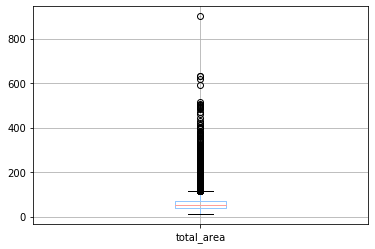

In [56]:
#Убираю выбросы
import matplotlib.pyplot as plt
apartments_info.boxplot(column='total_area')

In [57]:
total_area_index_drop = apartments_info[apartments_info['total_area'] > 170].index
apartments_info = apartments_info.drop(total_area_index_drop).reset_index(drop=True)

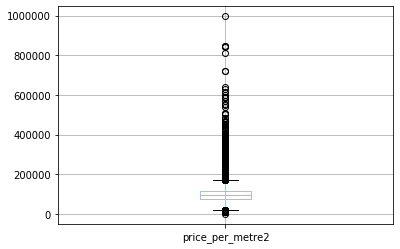

In [58]:
#Убираю выбросы
import matplotlib.pyplot as plt
apartments_info.boxplot(column='price_per_metre2')

In [59]:
price_index_drop = apartments_info[apartments_info['price_per_metre2'] > 175000].index
apartments_info = apartments_info.drop(price_index_drop).reset_index(drop=True)

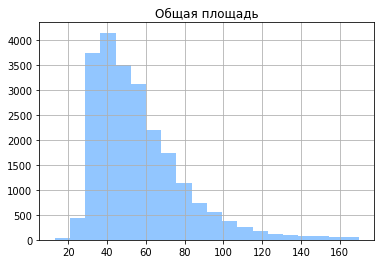

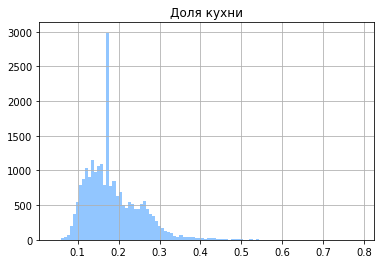

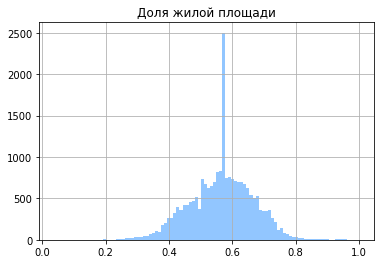

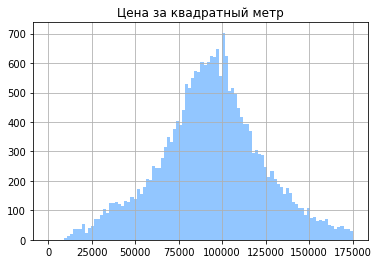

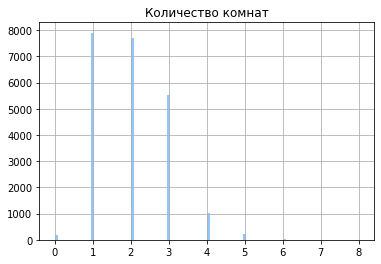

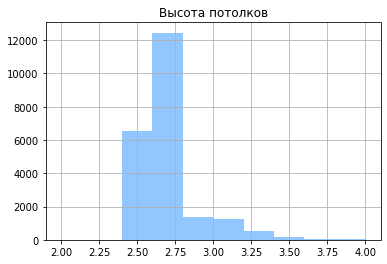

In [72]:
#Автоматизация построения диаграммы зависимости цены от даты

hist_table = apartments_info[['total_area', 'kitchen_area_part','living_area_part', 'price_per_metre2', 'rooms', 'ceiling_height']]
title = {'total_area':'Общая площадь',
          'kitchen_area_part':'Доля кухни',
          'living_area_part':'Доля жилой площади', 'price_per_metre2':'Цена за квадратный метр', 'rooms':'Количество комнат',
              'ceiling_height':'Высота потолков'}
for row in hist_table:
    if row == 'total_area':
        hist_table[row].hist(bins = 20)
    elif row == 'ceiling_height':
        hist_table[row].hist(range = (2,4))
    else:
        hist_table[row].hist(bins = 100)
     
    plt.title(title[row])
    plt.show()
    



### Вывод:
- 
Самая часто встречающаяся площадь квартиры находится в размахе от 30 до 45 кв. метров;
- 
Самый популярный периметр кухни от общей жилой площади занимает от 15 до 20 % общей площади
- 
Жилая площадь занимает от 50 до 70% общей
- 
Чаще всего цена за кв. метр составляет приблизительно 100000 
- 
Больше всего продают 1 и 2х комнатные квартиры
- 
Самой часто встречающейся высотой потолков является от 2.65 до 3.30

### Изучить время продажи квартиры. Построить гистограмму. Посчитать среднее и медиану. Описать, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [345]:
apartments_info['days_exposition'].describe()

count    18082.000000
mean       125.842993
std        118.548764
min          1.000000
25%         40.000000
50%         83.000000
75%        179.000000
max        500.000000
Name: days_exposition, dtype: float64

In [344]:
apartments_info['days_exposition'].median()

83.0

- 
Среднее время продажи квартиры 125 дней, то есть примерно 4 месяца
- 
Максимальное время  16 месяцев, скорее всего объявление забыли удалить
- 
Минимальное - 1 день, возможно передумали о продаже или выложили по ошибке и сразу удалили.
- 
Медиана - 83 дня

Медиана почти в полтора раза меньше среднего значения, будем считать ее более точно отражающей реальность, так как среднее значение завышено из-за высоких показателей, таких как 500 - максимальное количество дней.

Быстрой продажей можно считать до 40 дней, нормальной скоростью продажи можно назвать период в 40-180 дней, а медленной - от 180 и больше дней.

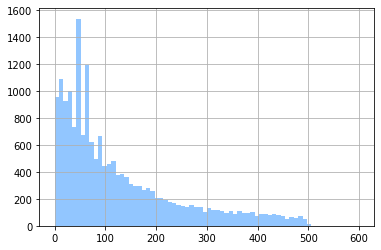

In [209]:
#Построение гистограммы количества дней продажи
apartments_info['days_exposition'].hist(range = (0, 600), bins = 70)



Пик продаж выпадает на 100 день публикации объявления, в основном квартиры снимаются с продажи за первые 100 дней

Убрать редкие и выбивающиеся значения. Описать, какие особенности обнаружили.

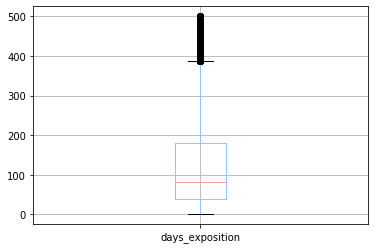

In [210]:
#Убираю выбросы
import matplotlib.pyplot as plt
apartments_info.boxplot(column='days_exposition')

Дольше 500 дней квартиры продаются редко, ограничимся промежутком от 0 до 500 дней

In [211]:
days_exposition_index_drop = apartments_info[apartments_info['days_exposition'] > 500].index
apartments_info = apartments_info.drop(days_exposition_index_drop).reset_index(drop=True)

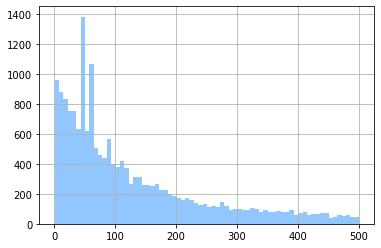

In [212]:
apartments_info['days_exposition'].hist(bins = 70)

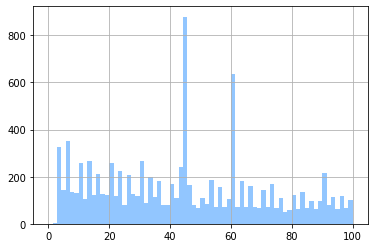

In [213]:
#Посмотрим ближе на пики
apartments_info.query('days_exposition<450')['days_exposition'].hist(range = (0, 100),bins = 70)

In [214]:
apartments_info['days_exposition'].describe()

count    18082.000000
mean       125.842993
std        118.548764
min          1.000000
25%         40.000000
50%         83.000000
75%        179.000000
max        500.000000
Name: days_exposition, dtype: float64

In [215]:
apartments_info['days_exposition'].median()

83.0

### Вывод:
- 
Среднее время продажи квартиры 125 дней, то есть примерно полгода;
- 
Максимальное время продажи квартиры 1,3 года;
- 
Минимальное время продажи квартиры - 1 день, возможно передумали о продаже или выложили по ошибке и сразу удалили;
- 
Медиана времени продажи квартиры - 83 дня;
- 
На 45, 60 и 90 день выпадают пики, возможно в этот период проверяется актуальность объявления и если это не подтверждать, то оно удаляется или переходит в архив автоматически;
- 
После избавления от выбросов среднее значение приблизилось у медианному, но все же остается выше;
- 
Быстрой продажей можно считать до 40 дней, нормальной скоростью продажи можно назвать период в 40-180 дней, а медленной - от 180 и больше дней.

In [216]:
#Максимальная цена квартиры
apartments_info['last_price'].max()

28521092.0

In [217]:
#Максимальная площадь квартиры в данных
apartments_info['total_area'].max()

170.0

### Какие факторы больше всего влияют на стоимость квартиры? Изучить, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучить зависимость от даты размещения: дня недели, месяца и года

In [218]:
#Разделение локации квартир на центральную - Санкт-Петербург и областную - область для определения разницы цены по удаленности от центрального города
def cityCenters_nearest_grouped(row):
    if row['cityCenters_nearest'] <= 10000: 
        return 'центр Санкт-Петербурга'
    else:
        return 'область'
    
apartments_info['cityCenters_nearest_grouped'] = apartments_info.apply(cityCenters_nearest_grouped, axis = 1)

apartments_info['cityCenters_nearest_grouped'].value_counts()

область                   17237
центр Санкт-Петербурга     3762
Name: cityCenters_nearest_grouped, dtype: int64

In [364]:
#Автоматизация построения диаграммы зависимости цены от количества комнат и этажа.
def depend_price(df, column):
    title_dict = {'rooms': 'Зависимость цены от количества комнат', 'floors_grouped': 'Зависимость цены от этажа',
                  'cityCenters_kms': 'Зависимость цены от удаленности от центра города',
                  }
    plt.style.use('seaborn-pastel')
    if column == 'floors_grouped' or column == 'cityCenters_nearest':
        sort_key = 'price_per_metre2'
    else:
        sort_key = column
        
    df_filtered = df.groupby(column).median()['price_per_metre2'].reset_index().sort_values(by=sort_key)
    plot = df_filtered.plot(x=column, y="price_per_metre2", kind='bar', ec='black', 
                            title=title_dict[column], legend=None, figsize=(9,4))

    return plot

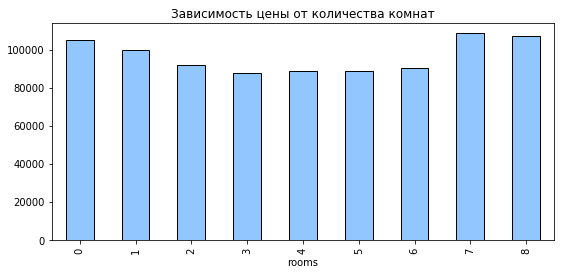

In [347]:
#Зависимость цены от количества комнат
depend_price(apartments_info, 'rooms')

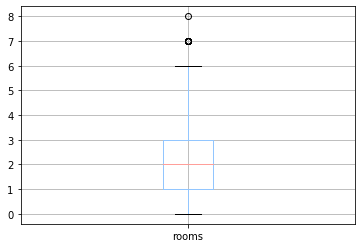

In [221]:
#Убираю выбросы
apartments_info.boxplot(column='rooms')

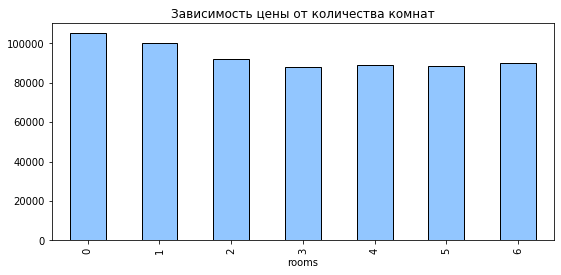

In [222]:
#Посмотрим на диаграмму без выбросов

depend_price(apartments_info.query('rooms <= 6'), 'rooms')

Избавившись от выбросов видно, что цена за метр на 3х комнатные квартиры самая низкая, возможно так, потому что спрос на такие квартиры самый низкий

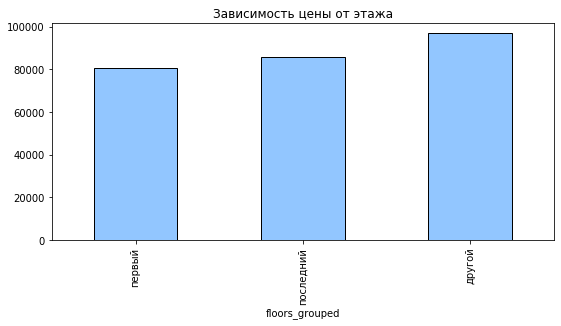

In [223]:
#Зависимость цены от этажа
depend_price(apartments_info, 'floors_grouped')

Квартиры на первом и последнем этажах самые дешевые

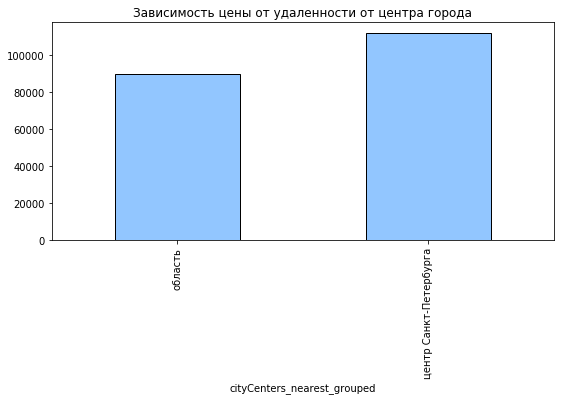

In [224]:
#Зависимость цены от удаленности от региона 
depend_price(apartments_info, 'cityCenters_nearest_grouped')

Цены на жилье в Санкт-Петербурге выше, чем в Ленинградской области

In [373]:
#Автоматизация построения диаграммы зависимости цены от даты
def depend_time1_price(df, column):
    title_dict = {
                  'day':'Зависимость цены от дня недели', 'month': 'Зависимость цены от месяца',
                  'year': 'Зависимость цены от года'
                  }
    plt.style.use('seaborn-pastel')
    sort_key = column
        
    df_filtered = df.groupby(column).median()['price_per_metre2'].reset_index().sort_values(by=sort_key)
    plot = df_filtered.plot(x=column, y="price_per_metre2", 
                            title=title_dict[column], legend=None, figsize=(9,4))

    return plot

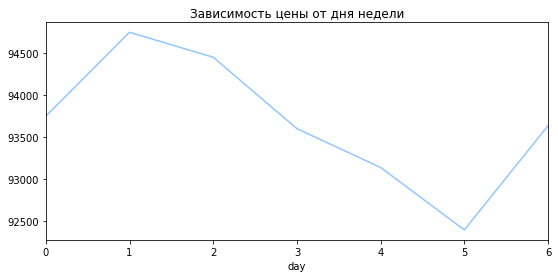

In [374]:
#Зависимость цены от дня недели публикации
depend_time1_price(apartments_info, 'day')

In [266]:
apartments_info['price_per_metre2'].corr(apartments_info['day'])

-0.016248496007388924

Пик цены за квадратный метр во вторник далее она уменьшается и самая низкая цена в субботу.
Корреляция отрицательная и приближается к 0, значит зависимость минимальная,практически отсутствует.

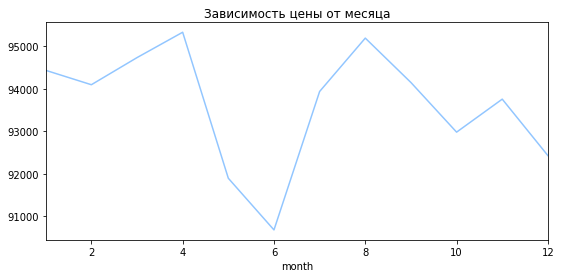

In [375]:
#Зависимость цены от месяца публикации
depend_time1_price(apartments_info, 'month')

In [254]:
apartments_info['price_per_metre2'].corr(apartments_info['month'])

-0.007094270248588167

Стоимость квадратного метра падает к наступлению лета, и снова увеличивается к осени. Корреляция отрицательная и близка к нулю, что говорит о том, что зависимость практически отсутствует.

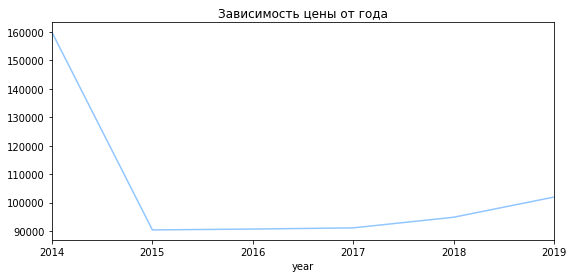

In [376]:
#Зависимость цены от года публикации
depend_time1_price(apartments_info, 'year')

In [151]:
apartments_info['price_per_metre2'].corr(apartments_info['year'])

0.07545582921222478

Самые высоки цены на квадратные метры были в 2014 и 2019 годах, в 2015 цены упали и в период с 2015 по 2017 - цены сильно не менялись. Коэффициент корреляции Пирсона также показывает слабую зависимость цены от года.

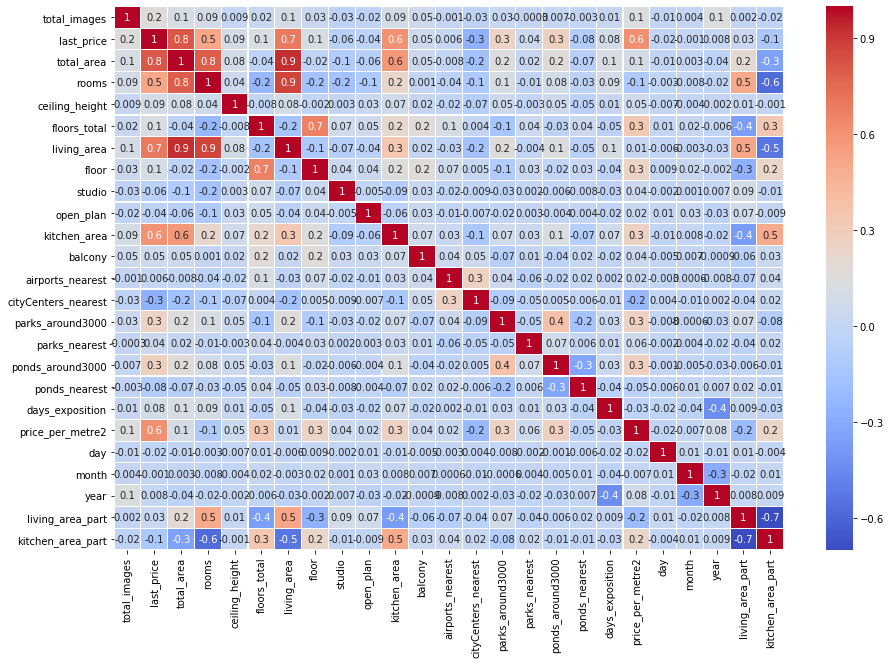

In [271]:
#Матрица корреляции

import seaborn as sns

corrmat = apartments_info.corr()

  

f, ax = plt.subplots(figsize =(15, 10))

sns.heatmap(corrmat, ax = ax, cmap= 'coolwarm', linewidths = 0.1, annot = True, fmt='.1g')



На матрице корреляции наглядно представлена зависимость величин. Цена увеличивается в зависимости от:
- 
размера общей площади
- 
количества комнат
- 
размера жилой площади
- 
размера кухни

а также, но уже в меньшей степени, от:
- 
наличия парков и прудов в округе 
- 
количества этажей в здании
- 
этажа, на котором расположена квартира




### Вывод:
- 
цена за метр на 3х комнатные квартиры самая низкая, возможно так, потому что спрос на такие квартиры самый низкий
- 
Квартиры на первом и последнем этажах самые дешевые
- 
Цены на жилье в Санкт-Петербурге выше, чем в Ленинградской области
- 
Пик цены за квадратный метр во вторник далее она уменьшается и самая низкая цена в субботу
- 
Стоимость квадратного метра падает к наступлению лета, и снова увеличивается к осени
- 
Самые высоки цены на квадратные метры были в 2014 и 2019 годах, в 2015 цены упали и в период с 2015 по 2017 - цены сильно не менялись

### Выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в этих населённых пунктах. Выделить населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [ ]:
#10 населённых пунктов с наибольшим числом объявлений со средней ценой квадратного метра

top10_locality = apartments_info.groupby('locality_name').agg({'first_day_exposition': 'count', 'price_per_metre2':'mean'}).rename(columns = {'first_day_exposition':'applications'}).sort_values(by = 'applications', ascending = False).head(10)

top10_locality


In [ ]:
#населённые пункты в порядке уменьшения цены за квадратный метр
top10_locality.sort_values(by = 'price_per_metre2', ascending = False)

Самое дорогое жилье в Санкт-Петербурге и Пушкине, а самое дешевое - в Выборге и Всеволжске

### Изучить предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделить квартиры в Санкт-Петербурге ('locality_name'). Задача — выяснить, какая область входит в центр. Создайть столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитать среднюю цену для каждого километра. Построить график: он должен показывать, как цена зависит от удалённости от центра. Определить границу, где график сильно меняется — это и будет центральная зона.

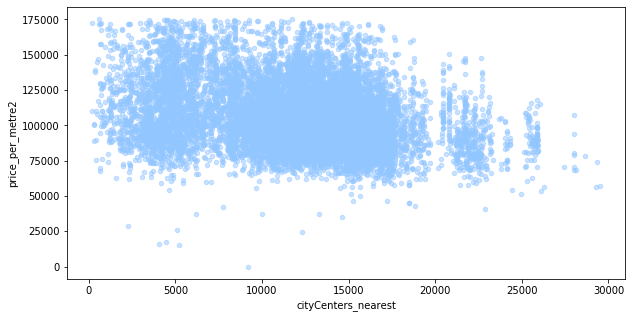

In [273]:
#Распределение цены за квадратный метр в Санкт-Петербурге по удаленности от центра
apartments_info.query('locality_name == "Санкт-Петербург" ').plot(kind = 'scatter',
                                                                x = 'cityCenters_nearest',
                                                                y = 'price_per_metre2',
                                                                alpha = 0.5,
                                                                figsize = (10, 5))

plt.show()

Из точечной диаграммы видно, что высокие цены сосредоточены в радиусе до 10 км от центра в Санкт-Петербурге

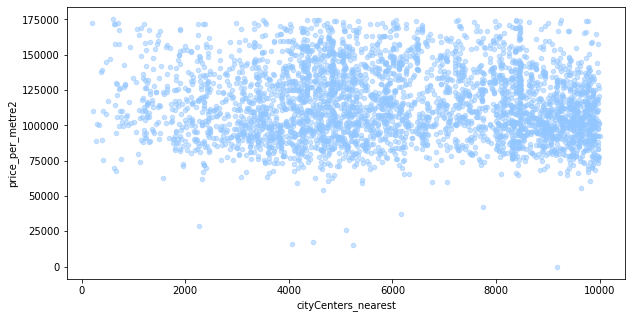

In [274]:
#Посмотрим на распределение цен ближе, на расстоянии до 10 км
apartments_info.query('locality_name == "Санкт-Петербург" & cityCenters_nearest <= 10000').plot(kind = 'scatter',
                                                                x = 'cityCenters_nearest',
                                                                y = 'price_per_metre2',
                                                                alpha = 0.5,
                                                                figsize = (10, 5))

plt.show()

Ажиотаж высоких цен заканчивается у 8км от центра, значит определим квартиры в центре, как те, что находятся в радиусе 8 км от центра.

In [277]:
#столбец с расстоянием до центра в километрах: округленный до целых значений
spb_info = apartments_info.query('locality_name == "Санкт-Петербург"')
apartments_info.loc[:, 'cityCenters_kms'] = (spb_info.loc[:, 'cityCenters_nearest']/1000).round()
spb_info.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_per_metre2,day,month,year,floors_grouped,living_area_part,kitchen_area_part,cityCenters_nearest_grouped,cityCenters_kms
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,NaN,...,NaN,120370,3,3,2019,другой,0.472222,0.231481,область,16.0
2,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,NaN,...,121.0,100000,1,6,2018,другой,0.320000,0.410000,центр Санкт-Петербурга,8.0
5,5,7915000.0,71.6,2019-04-18,2,2.70,24,40.882144,22,NaN,...,NaN,110544,3,4,2019,другой,0.570980,0.263966,область,12.0
7,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.600000,7,NaN,...,289.0,88524,6,2,2017,другой,0.714754,0.106557,область,15.0
8,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.300000,3,NaN,...,137.0,127525,3,11,2017,другой,0.512626,0.214646,область,14.0


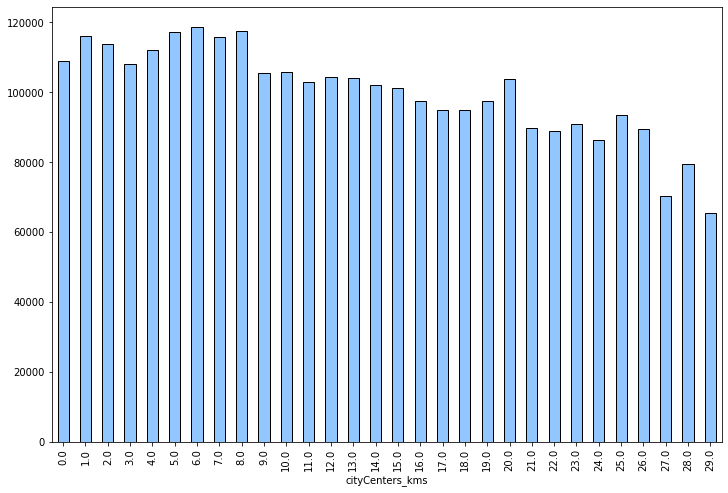

In [278]:
spb_info_filtered = spb_info.groupby('cityCenters_kms').median()['price_per_metre2'].reset_index()
plot = spb_info_filtered.plot(x='cityCenters_kms', y="price_per_metre2", kind='bar', ec='black', legend=None, figsize = (12,8))

Цена в самом центре самая высокая, а дальше всего - меньше всего. однако происходит и скачек цены, возможно районы, которые удалены от центра на 4-6 км элитнее, чем те, что удалены на 3 км.
Резкое падение цены происходит на 8 км, следовательно, суждения подтвердились, считаем радиус 8 км - центром.

### Выделить сегмент квартир в центре. Проанализировать эту территорию и изучить следующие параметры: 
- 
площадь
- 
цена
- 
число комнат
- 
высота потолков.

In [359]:
aparts_in_center = spb_info.query('cityCenters_kms <= 8')
aparts_in_center

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_per_metre2,day,month,year,floors_grouped,living_area_part,kitchen_area_part,cityCenters_nearest_grouped,cityCenters_kms
2,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,...,121.0,100000,1,6,2018,другой,0.320000,0.410000,центр Санкт-Петербурга,8.0
20,8,6500000.0,97.20,2015-10-31,2,2.70,3,46.5,1,NaN,...,265.0,66872,5,10,2015,первый,0.478395,0.201646,центр Санкт-Петербурга,2.0
44,20,11795000.0,136.00,2017-09-22,6,3.00,2,94.0,2,NaN,...,NaN,86727,4,9,2017,последний,0.691176,0.080882,центр Санкт-Петербурга,7.0
54,2,20000000.0,118.00,2018-09-11,3,3.00,9,68.0,7,NaN,...,37.0,169491,1,9,2018,другой,0.576271,0.135593,центр Санкт-Петербурга,5.0
61,9,3400000.0,30.00,2018-09-05,1,2.70,5,16.0,1,NaN,...,14.0,113333,2,9,2018,первый,0.533333,0.233333,центр Санкт-Петербурга,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20951,7,4990000.0,62.50,2018-04-26,2,2.70,4,32.3,4,NaN,...,166.0,79840,3,4,2018,последний,0.516800,0.193600,центр Санкт-Петербурга,4.0
20969,11,4250000.0,47.00,2016-05-20,1,2.70,6,18.2,1,False,...,131.0,90425,4,5,2016,первый,0.387234,0.310638,центр Санкт-Петербурга,5.0
20983,13,5250000.0,43.00,2018-05-11,2,2.50,5,29.0,2,NaN,...,80.0,122093,4,5,2018,другой,0.674419,0.139535,центр Санкт-Петербурга,7.0
20992,3,5500000.0,52.00,2018-07-19,2,2.70,5,31.0,2,NaN,...,15.0,105769,3,7,2018,другой,0.596154,0.115385,центр Санкт-Петербурга,6.0


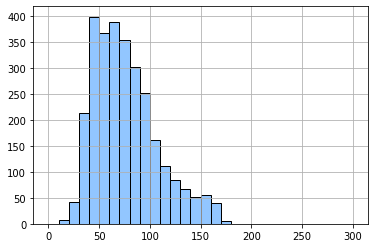

In [284]:
#Площадь квартир в центре
aparts_in_center['total_area'].hist(range = (0, 300), bins = 30, ec = 'black')

Большая часть квартир в центре площадью от 45 кв. метров до 100 кв. метров, что отличается от общей картины, где большая часть квартир представлены в размере от 30 до 45 кв. метров.

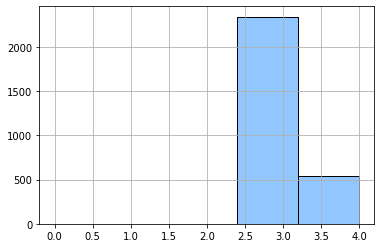

In [285]:
aparts_in_center['ceiling_height'].hist(range = (0, 4), bins = 5, ec = 'black')

В основном высота потолков в центре составляет от 2,5 метров до 3,5, похоже на высоту потолков по общим данным.

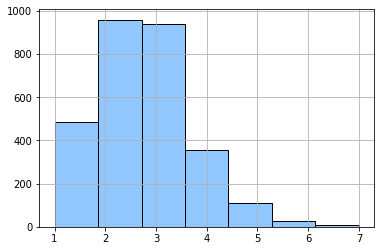

In [286]:
aparts_in_center['rooms'].hist(range = (1, 7), bins = 7, ec = 'black')

2х и 3х комнатные квартиры самые распространённые в центре, что отличается от общих данных, где чаще всего продают 1 и 2-х комнатные квартиры, 3х комнатные менее популярные.

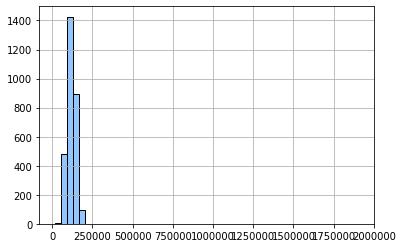

In [287]:
#По минимальному и максимальному значению цена за кв метр в центре построим гистограмму  цен
aparts_in_center['price_per_metre2'].hist(range = (15345, 1907500), bins = 50, ec = 'black')

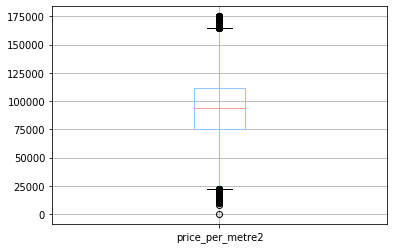

In [288]:
#Убираю выбросы
apartments_info.boxplot(column='price_per_metre2')

In [318]:
price_center_index_drop = aparts_in_center[aparts_in_center['price_per_metre2'] > 170000].index
price_center_index_drop = aparts_in_center[aparts_in_center['price_per_metre2'] < 20000].index
aparts_in_center = aparts_in_center.drop(price_center_index_drop).reset_index(drop=True)

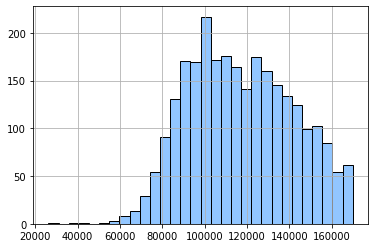

In [319]:
aparts_in_center['price_per_metre2'].hist( bins = 30, ec = 'black')

Цены в центре варьируются от 90000 до 150000 за кв. метр, что выше среднего по общим показателям.

### Вывод:
- 
Большая часть квартир в центре площадью от 45 кв. метров до 100 кв. метров
- 
В основном высота потолков в центре составляет от 2,5 метров до 3,5
- 
2х и 3х комнатные квартиры самые распространённые в центре 
- 
Цены в центре варьируются от 90000 до 150000 за кв. метр

### Также выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайть выводы. Отличаются ли они от общих выводов по всему городу?

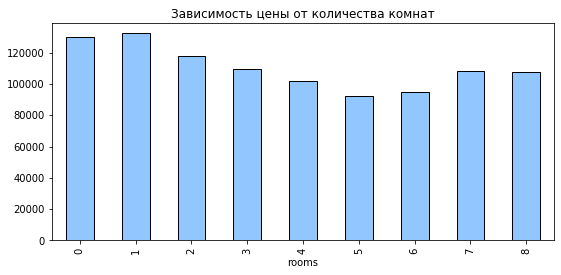

In [365]:
#Зависимость цены за квадратный метр от количества комнат.
depend_price(aparts_in_center, 'rooms')

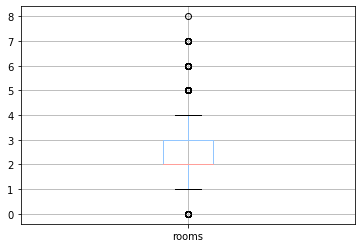

In [366]:
#Убираю выбросы
aparts_in_center.boxplot(column='rooms')

In [316]:
rooms_center_index_drop = aparts_in_center[ aparts_in_center['rooms'] > 4].index
rooms_center_index_drop = aparts_in_center[ aparts_in_center['rooms'] < 1].index
aparts_in_center = aparts_in_center.drop(rooms_center_index_drop).reset_index(drop=True)

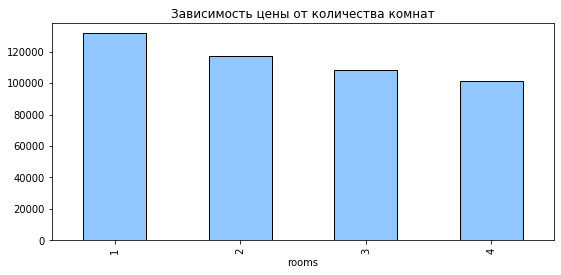

In [317]:
#Посмотрим на диаграмму без выбросов
depend_price(aparts_in_center, 'rooms')

Избавившись от выбросов видно, что цена за метр на 1-комнатные квартиры выше, чем на остальные 2х, 3х и 4х комнатные квартиры.

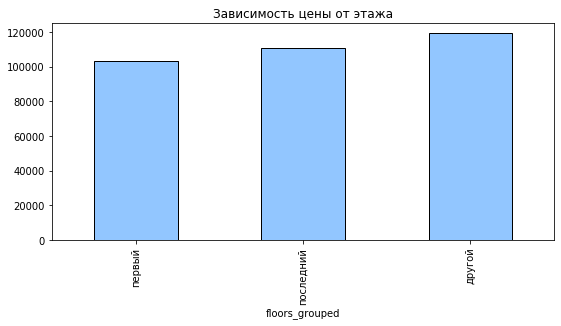

In [320]:
#Зависимость цены за квадратный метр от этажа
depend_price(aparts_in_center, 'floors_grouped')

В центре Санкт-Петербурга первый и последний этажи самые дешевые

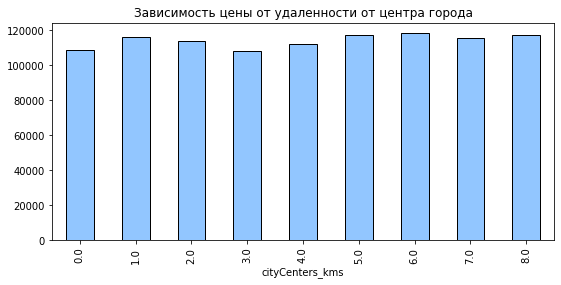

In [368]:
#Зависимость цены за квадратный метр от удаленности от центра
depend_price(aparts_in_center, 'cityCenters_kms')

In [326]:
aparts_in_center['price_per_metre2'].corr(apartments_info['cityCenters_kms'])

0.007423454070342317

На 3 км от центра виден скачек цены, возможно районы, которые удалены от центра на 4-6 км элитнее, чем те, что удалены на 3 км. Коэффициент зависимости низкий.


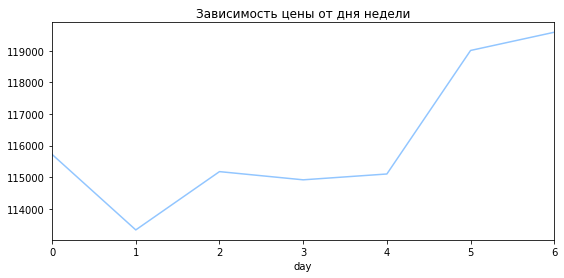

In [377]:
#Зависимость цены от дня недели публикации
depend_time1_price(aparts_in_center, 'day')

In [327]:
aparts_in_center['price_per_metre2'].corr(apartments_info['day'])

-0.009412388671293006

Существенная зависимость отсутствует, однако в воскресенье чуть дороже чем в остальные дни, а во вторник - дешевле.
Коэффициент зависимости низкий.

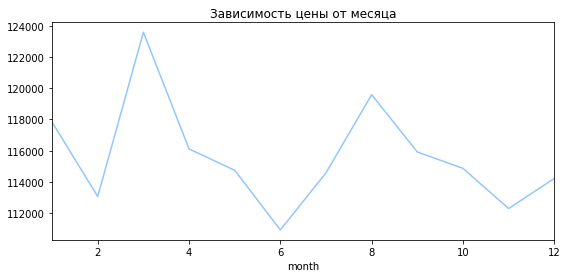

In [378]:
#Зависимость цены за квадратный метр от месяца публикации объявления о продаже
depend_time1_price(aparts_in_center, 'month')

In [328]:
aparts_in_center['price_per_metre2'].corr(apartments_info['month'])

0.005331595794662527

В Санкт-Петербурге к середине года цена за квадратный метр снижается, а после снова поднимается ( 1 в 1 как и по общим данным), самый дорогой месяц - март. 
Коэффициент зависимости низкий.

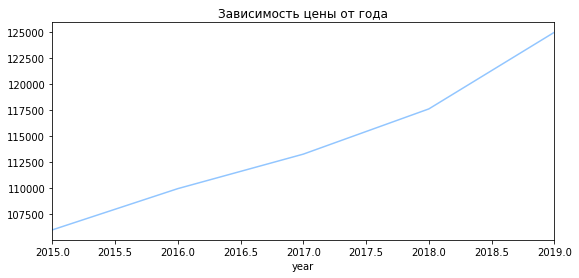

In [379]:
#Зависимость цены за квадратный метр от года публикации объявления о продаже

depend_time1_price(aparts_in_center, 'year')


In [329]:
aparts_in_center['price_per_metre2'].corr(apartments_info['year'])

0.013241690609408613

В центре Санкт-Петербурга квартиры только дорожают со временем, что существенно отличается от общих данных). Однако, коэффициент зависимости низкий

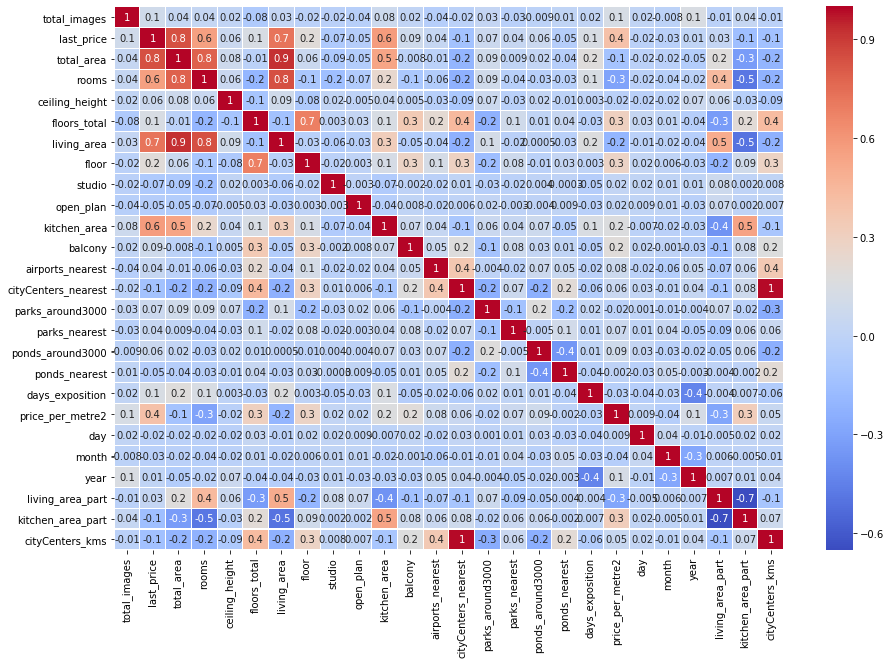

In [299]:
#Матрица корреляции по квартирам, расположенным  в центре Санкт-Петербурга

import seaborn as sns

corrmat = aparts_in_center.corr()

  

f, ax = plt.subplots(figsize =(15, 10))

sns.heatmap(corrmat, ax = ax, cmap= 'coolwarm', linewidths = 0.1, annot = True, fmt='.1g')


На матрице корреляции наглядно представлена зависимость величин. Цена квартиры в центре Санкт-Петербурга увеличивается в зависимости от:
- 
размера общей площади
- 
размера жилой площади
- 
количества комнат
- 
размера кухни

а также, но уже в меньшей степени, от:

- 
наличия парков и прудов в округе
- 
количества этажей в здании
- 
этажа, на котором расположена квартира

Все соответсвует показателям по общим данным.

### Шаг 5. Общий вывод

В ходе выполнения работы было выполнено следующее:
- 
Предобработаны данные: заполнены пропуски, которые мешали проведению анализа, а также изменены типы данных на целочисленные
- 
Посчитаны и добавлены в таблицу данные: день, месяц и год публикации, цена за квадратный метр, доля жилой площади по отношению к общей, доля площади кухни по отношению к жилой.
- 
Проведен исследовательский анализ данных: анализ зависимости цены по общим данным и в центре Санкт-Петербурга от таких факторов как этаж, площадь, время публикации, удаленность от центра

#### Зависимость цены от количества комнат:

По общим данным, цены за квадратный метр на 3х комнатные квартиры ниже, чем на остальную комнатность. В то время как в центре Санкт-Петербурга самая низкая цена за квадратный метр на 4х комнатные квартиры, самые высоки на 2х комнатные.
- 
Коэффициент корреляции по общим данным: 0.5
- 
Коэффициент корреляции в Санкт-Петербурге: 0.6

Зависимость цены от количества комнат сильнее выражена в Санкт-Петербурге, чем больше комнат, тем дороже квартира.

#### Зависимость цены от этажа:

По общим данным также, как и в центре Санкт-Петербурга первый и последний этажи самые дешевые.
- 
Коэффициент корреляции по общим данным: 0.1
- 
Коэффициент корреляции в Санкт-Петербурге: 0.2

Зависимость цены от этажа небольшая, и в Санкт-Петербурге она проявляется в меньшей степени, чем в области.

#### Зависимость цены от удаленности от центра:

Цены на квартиры в Ленинградской области ниже, чем в Санкт-Петербурге, а в Санкт-Петербурге цены уменьшаются с увеличением расстояния от центра, однако на 3 км от центра виден скачек цены, возможно районы, которые удалены от центра на 4-6 км элитнее, чем те, что удалены на 3 км. 

- Коэффициент корреляции по общим данным: -0.3
- 
Коэффициент корреляции в Санкт-Петербурге: -0.1

Чем дальше от центра – тем дешевле квартиры.

#### Зависимость цены от даты размещения:
- 
зависимость цены от дня недели размещения объявления:
   
Цена квадратного метра квартиры по общим данным не зависит от дня недели публикации объявления, однако в опубликованные объявления о продаже в субботу, немного дешевле, чем в остальные дни. В Санкт-Петербурге также явная зависимость отсутствует.
- 
Коэффициент корреляции по общим данным: -0.02
- 
Коэффициент корреляции в Санкт-Петербурге: -0.02

Коэффициенты подтверждают, что зависимость незначительная.
- 
зависимость цены от месяца размещения объявления:

По общим данным весомая зависимость стоимости квадратного метра от месяца публикации отсутствует, в то время как в Санкт-Петербурге к середине года цена за квадратный метр снижается, а после снова поднимается.
- 
Коэффициент корреляции по общим данным: -0.001
- 
Коэффициент корреляции в Санкт-Петербурге: -0.03

Санкт-Петербург больше поддается сезонному влиянию, однако влияние месяца продажи на цену незначительное.
- 
зависимость цены от года размещения объявления:

По общим данным также, как и в центре Санкт-Петербурга самые высоки цены за квадратные метр были в 2014 и 2019 годах, в период с 2015 по 2018 - цены сильно не менялись.
- 
Коэффициент корреляции по общим данным: -0.008
- 
Коэффициент корреляции в Санкт-Петербурге: 0.01

В Санкт-Петербурге с годами цены только растут, однако, не сильно. Чего не скажешь про общие показатели по городу и области, показатели практически не коррелируют.
